# Kelompok 5 Project UAS Projek Machine Learning
### Muhamad Rizki - 1306620051
### Yusuf Niko Fitranto - 1306620033
### Raditya Sebastian - 1306620042

In [ ]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


#Data Preprocessing

In [ ]:
# Memasukkan dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


#### Mengecek NULL

In [ ]:
# Mengecek NULL
Check_Null = df.isnull().values.any()
Check_Null

False

##### Mengecek dan Menghapus Outlier

<Axes: >

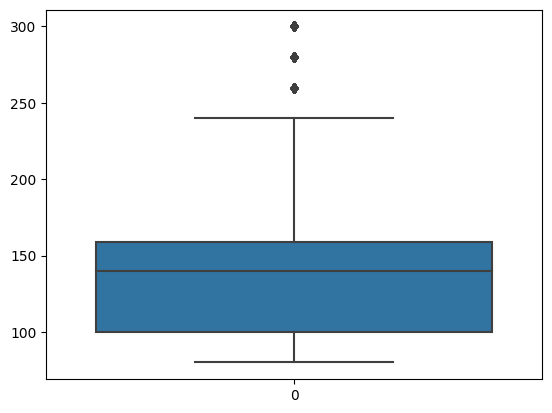

In [ ]:
# Mengecek dan menghapus Outlier
sns.boxplot(df['blood_glucose_level'])

In [ ]:
# Membuat quartil
Q1 = df['blood_glucose_level'].quantile(0.25)
Q3 = df['blood_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Membuat daftar nilai Boolean untuk menandai baris yang tidak biasa
upper_array = np.where(df['blood_glucose_level'] >= upper)[0]
lower_array = np.where(df['blood_glucose_level'] <= lower)[0]

# Menghapus outlier
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)


<Axes: >

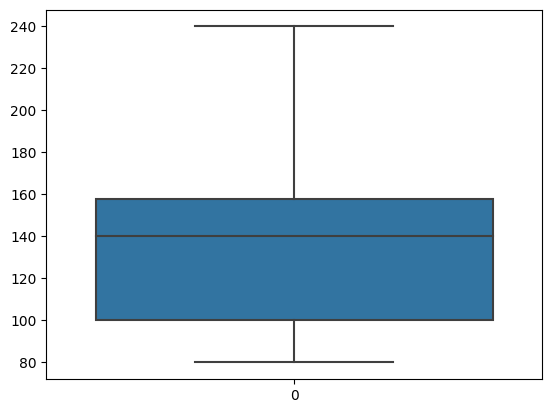

In [ ]:
# Plot fitur data
sns.boxplot(df['blood_glucose_level'])

##### One Hot Encoding

In [ ]:
# Mengaplikasikan one_hot_encoding menggunakan feature pd get_dummies
df_new = pd.get_dummies(df, columns = ['gender','smoking_history'])
# Membuat data baru setelah one hot encoding
df_new

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,0,0,1,0


In [ ]:
# Memperbaiki posisi kolum
nama_nama_col = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male',
       'gender_Other', 'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current','diabetes']
df_new = df_new[nama_nama_col]
df_new

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,diabetes
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0,0
1,54.0,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0,0
3,36.0,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,1,0,0,1,0,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,1,0,0,1,0,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,1,0,0,0,0,1,0,0,0
99998,24.0,0,0,35.42,4.0,100,1,0,0,0,0,0,0,1,0,0


(array([91500.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6462.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

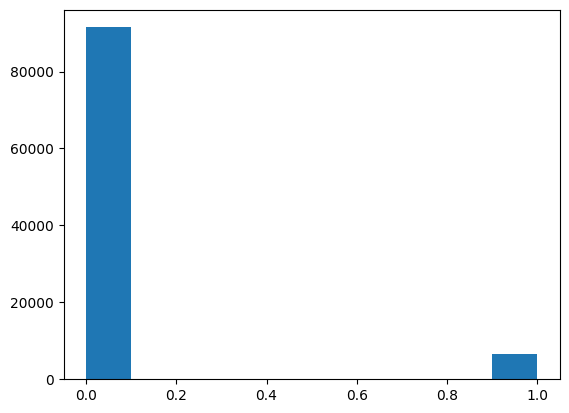

In [ ]:
# Membuat plot histogram fitur data
plt.hist(df_new['diabetes'])

In [ ]:
# Melakukan splitting data
X = df_new.loc[:, df_new.columns!='diabetes']
y = df_new['diabetes']

### Melakukan Oversampling

In [ ]:
# Melakukan standarisasi data
std_scaler = StandardScaler()
ros = RandomOverSampler()
X,y = ros.fit_resample(X,y)

(array([91500.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 91500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

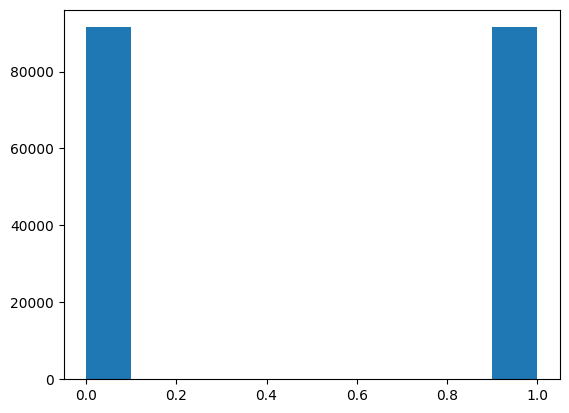

In [ ]:
# Membuat histogram data
plt.hist(y)

### Mengsplit Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    shuffle=True)

### Mengnormalisasi Data

In [ ]:
scaler = MinMaxScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.fit_transform(X_test)

Model Naive Bayes

In [ ]:
# Mengimpor modul
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# Membuat model
NB_model = GaussianNB()

In [ ]:
# Prediksi Model
NB_model.fit(X_normalized_train,y_train)
y_NB_pred = NB_model.predict(X_normalized_test)

In [ ]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_NB_pred)
print('Akurasi:',accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_NB_pred)
print('presisi:',precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_NB_pred)
print('recall:',recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_NB_pred)
print('f1 score:',f1)

Akurasi: 0.6488524590163934
presisi: 0.5882637277648879
recall: 0.9959083469721768
f1 score: 0.7396377780478911


### Model MLP

In [ ]:
# Menentukan parameter model
model_MLP.compile(optimizer=tf.keras.optimizers.SGD(0.01),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
# Melakukan iterasi model
hasil_model =model_MLP.fit(X_normalized_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
3660/3660 [==============================] - 23s 6ms/step - loss: 0.4568 - accuracy: 0.7925 - val_loss: 0.3063 - val_accuracy: 0.8615
Epoch 2/10
3660/3660 [==============================] - 10s 3ms/step - loss: 0.2891 - accuracy: 0.8657 - val_loss: 0.2899 - val_accuracy: 0.8639
Epoch 3/10
3660/3660 [==============================] - 9s 2ms/step - loss: 0.2828 - accuracy: 0.8683 - val_loss: 0.2874 - val_accuracy: 0.8668
Epoch 4/10
3660/3660 [==============================] - 9s 2ms/step - loss: 0.2820 - accuracy: 0.8692 - val_loss: 0.2870 - val_accuracy: 0.8674
Epoch 5/10
3660/3660 [==============================] - 8s 2ms/step - loss: 0.2817 - accuracy: 0.8692 - val_loss: 0.2862 - val_accuracy: 0.8665
Epoch 6/10
3660/3660 [==============================] - 9s 2ms/step - loss: 0.2816 - accuracy: 0.8697 - val_loss: 0.2900 - val_accuracy: 0.8673
Epoch 7/10
3660/3660 [==============================] - 9s 2ms/step - loss: 0.2812 - accuracy: 0.8704 - val_loss: 0.2890 - val_accurac

In [ ]:
y_MLP_pred=model_MLP.predict(X_normalized_test)
y_MLP_pred =(y_MLP_pred>0.5).astype(int).reshape(-1,)

1144/1144 [==============================] - 2s 2ms/step


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_MLP_pred)
print('Akurasi:',accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_MLP_pred)
print('presisi:',precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_MLP_pred)
print('recall:',recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_MLP_pred)
print('f1 score:',f1)

Akurasi: 0.8757103825136612
presisi: 0.8534496024621698
recall: 0.9076923076923077
f1 score: 0.8797356245869135


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Membangun model Decision Tree
model = DecisionTreeClassifier(random_state=0)

# Melatih model
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

# Evaluasi akurasi pada data pelatihan
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Akurasi pada data pelatihan:", accuracy_train)

# Melakukan prediksi pada test set
y_pred = model.predict(X_test)

  # accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
  # precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print("Presisi:", precision)
  # recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
  # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print("F1-Score", f1)

Akurasi pada data pelatihan: 0.9992691256830601
Akurasi: 0.985191256830601
Presisi: 0.9712802034760492
Recall: 1.0
F1-Score 0.9854308908123219


#### Evaluasi Model

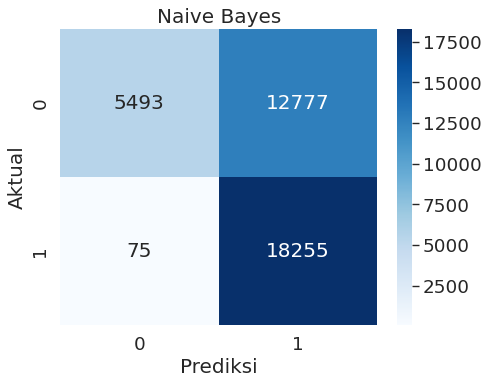

In [ ]:
dt_NB = confusion_matrix(y_test, y_NB_pred)
sns.set(font_scale=1.5)
plt.figure(dpi=80)
sns.heatmap(dt_NB, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prediksi')
plt.title('Naive Bayes')
plt.ylabel('Aktual')
plt.show()

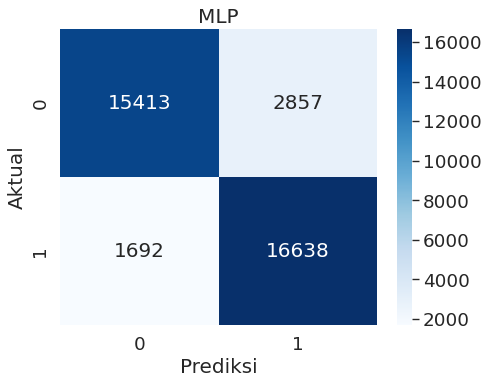

In [ ]:
dt = confusion_matrix(y_test, y_MLP_pred)
sns.set(font_scale=1.5)
plt.figure(dpi=80)
sns.heatmap(dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prediksi')
plt.title('MLP')
plt.ylabel('Aktual')
plt.show()

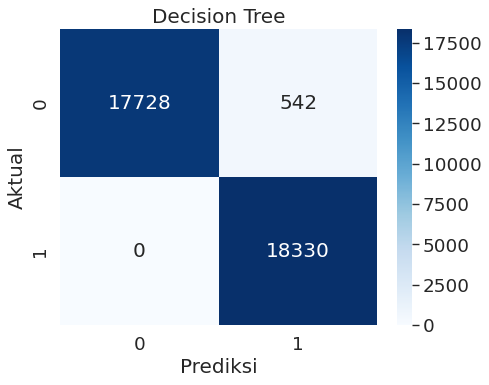

In [ ]:
dt = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5)
plt.figure(dpi=80)
sns.heatmap(dt, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prediksi')
plt.title('Decision Tree')
plt.ylabel('Aktual')
plt.show()

Kesimpulan:<br>
